<a href="https://colab.research.google.com/github/will-cotton4/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/(Will_Cotton)_U1SC4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 4

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 (the class attribute) is the most interesting, as it separates the 307 approved cases from the 383 rejected cases. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.

In [0]:
import pandas as pd
credit_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data'
credit_names = ["A" + str(i) for i in range(1,17)]
credit_data = pd.read_csv(credit_url, names = credit_names)


- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).


In [8]:
credit_data.shape

(690, 16)

- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na


In [17]:
#Looks like the missing values are coded as ?s:
credit_data['A1'].value_counts()

b    468
a    210
?     12
Name: A1, dtype: int64

In [0]:
import numpy as np
credit_data = credit_data.replace("?", np.NaN)

- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [19]:
#A2, A11, A14, A15 are described as continuous in the attribute info but treated
#differently here; let's correct them.
credit_data.dtypes

A1      object
A2      object
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14     object
A15      int64
A16     object
dtype: object

In [21]:
faulty_columns = ['A2', 'A11', 'A14', 'A15']
credit_data[faulty_columns] = credit_data[faulty_columns].astype(float)
credit_data[faulty_columns].dtypes

A2     float64
A11    float64
A14    float64
A15    float64
dtype: object

## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

In [0]:
#Slice data to look at continuous variables against whether credit was granted 
#or denied.
cont_variables = ['A2', 'A3', 'A8', 'A11', 'A14', 'A15']
credit_data['A16'] = credit_data['A16'].replace({"+":1, "-":0})
cred_granted = credit_data[credit_data['A16']==1]
cred_denied = credit_data[credit_data['A16']==0]

**First, let's take a look at scatter matrices comparing the cases where credit was granted and where credit was denied:**

Credit granted:


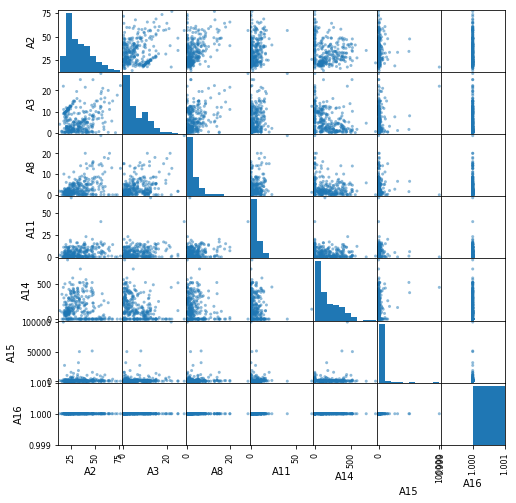

In [105]:
#for the sake of laziness
import warnings
warnings.filterwarnings('ignore')

print("Credit granted:")
mat1 = pd.plotting.scatter_matrix(cred_granted, figsize = (8,8))

Credit denied: 


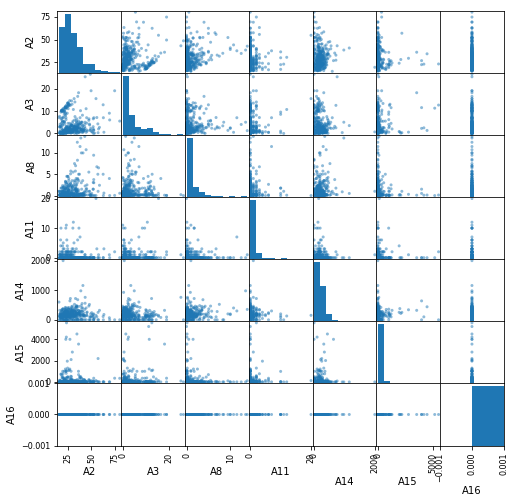

In [104]:
print("Credit denied: ")
mat2 = pd.plotting.scatter_matrix(cred_denied, figsize = (8,8))

**Somewhat difficult to judge just by looking at these plots, but it looks like the histogram for `A14` is significantly bumpier on the right tail for applicants with credit denied (suggesting, perhaps, a kind of gatekeeping on this variable; almost all of the applicants in the denied bin were clustered at the left end of the range).**

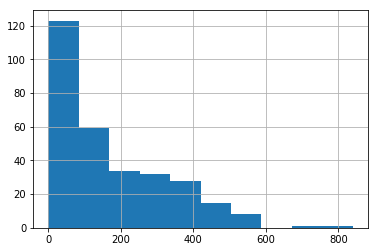

In [106]:
cred_granted['A14'].hist()

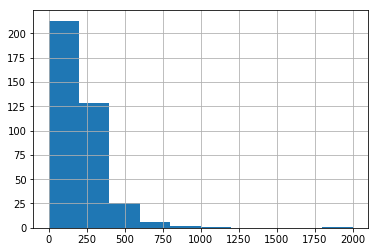

In [107]:
cred_denied['A14'].hist()

**The `cred_granted` group had about half as many in that first group (which, incidentally, looks like it includes higher values since the range is different) than the `cred_denied` group.**

**We'll loop through each column for both the applicants who were granted credit and those who were denied credit to test for significant differences between the samples in each continuous variable.**

**For each test:**

$H_0: $ no significant difference between variable means.

$H_A: $ statistically significant difference between means.

In [74]:
import scipy.stats as stats
for col in cont_variables:
  results = stats.ttest_ind(cred_granted[col], cred_denied[col], nan_policy = 'omit')
  print("Results for " + col + ": " + str((results)))

Results for A2: Ttest_indResult(statistic=4.2922156166315535, pvalue=2.0276637071781407e-05)
Results for A3: Ttest_indResult(statistic=5.52998337614816, pvalue=4.551680702308068e-08)
Results for A8: Ttest_indResult(statistic=8.935819983773698, pvalue=3.6710537401601785e-18)
Results for A11: Ttest_indResult(statistic=11.667004222431277, pvalue=7.957718568079967e-29)
Results for A14: Ttest_indResult(statistic=-2.6358251986645476, pvalue=0.008586135473979569)
Results for A15: Ttest_indResult(statistic=4.680216020964486, pvalue=3.4520256956287944e-06)


**Looks like each of the variables are different to statistically significant degrees. **

*The strongest difference across the sets is `A11`, which is significantly different on the order of $p \approx 7.96*10^{-29}$, with $t\approx 11.67$.*



*The variable with the least signifcant difference (though still statistically significant) was `A14`, with $p \approx 8.6*10^{-3}$ and $t \approx -2.64$.*

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

In [86]:
cat_variables = ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']
p = []
for col in cat_variables:
  
  ctab = pd.crosstab(credit_data[col], credit_data['A16'])
  print(col +" against A16: \n")
  print(ctab)
  chi_squared, p_value, dof, expected = stats.chi2_contingency(ctab)
  print("\n")
  p.append(p_value)
  print(f"Chi-Squared: {chi_squared}")
  print(f"P-value: {p_value}")
  if(p_value < 0.05):
    print("Significant with p < 0.05!")
  print(f"Degrees of Freedom: {dof}") 
  print("Expected: \n", np.array(expected))
  print("\n")
print(p)

A1 against A16: 

A16    0    1
A1           
a    112   98
b    262  206


Chi-Squared: 0.3112832649161995
P-value: 0.5768937883001117
Degrees of Freedom: 1
Expected: 
 [[115.84070796  94.15929204]
 [258.15929204 209.84070796]]


A4 against A16: 

A16    0    1
A4           
l      0    2
u    263  256
y    118   45


Chi-Squared: 26.234074966202144
P-value: 2.010680204180363e-06
Significant with p < 0.05!
Degrees of Freedom: 2
Expected: 
 [[  1.11403509   0.88596491]
 [289.09210526 229.90789474]
 [ 90.79385965  72.20614035]]


A5 against A16: 

A16    0    1
A5           
g    263  256
gg     0    2
p    118   45


Chi-Squared: 26.234074966202144
P-value: 2.010680204180363e-06
Significant with p < 0.05!
Degrees of Freedom: 2
Expected: 
 [[289.09210526 229.90789474]
 [  1.11403509   0.88596491]
 [ 90.79385965  72.20614035]]


A6 against A16: 

A16   0   1
A6         
aa   35  19
c    75  62
cc   12  29
d    23   7
e    11  14
ff   46   7
i    45  14
j     7   3
k    37  14
m    22  16

**The smallest p value occured for `A9`: a value of $~3.116*10^{-79}$, with a $\chi^2$ value of $~355.2$.**

**The differences for `A1` and `A12` were not statistically signifcant ($p>>0.05$).**

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?

**Based on the analysis comparing each continuous variable against itself in cases where credit was granted and credit was denied, each had a statistically significant difference in its mean. This suggests that each of the continuous variables factors directly into the decision whether to grant credit. These variables probably measure relevant quantitative statistics about an applicant, including income and credit score.**

**If one or more of the variables did not factor into the decision, we would expect to see no statistical difference in the distributions of the value, since that variable would likely be distributed similarly among applicants who were granted and denied credit.**

- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?

**Some of the categorical variables had extremely low p-values, which suggests that they are extremely influential in the application process. These probably relate to relevant qualitative factors, such as previous loan delinquency.**

**Two of the categorical variables had high enough p-values that differences could be attributable to chance; these probably don't factor directly in the process of granting or denying loans, but might indicate demographic indicators which could nonetheless have some (weak, indirect) relation to whether the applicant is granted a loan, but not to the extent that they were statistically significant in our analysis.**


- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

**I spent a fair amount of time panicking that none of the $\chi^2$ tests resulted in statistical significance before I realized that adding `margins` and `normalizing` the columns would cause the tests to return meaningless results. The rest of the assignment was fairly straightforward.**